In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Car Ownership.csv')
df.keys()

Index(['Occupation', 'Monthly Income', 'Credit Score', 'Years of Employment',
       'Finance Status', 'Finance History', 'Car', 'Number of Children'],
      dtype='object')

In [3]:
df = df[['Monthly Income', 'Car']]
df = df.head(25)
df = df.fillna(0)
df

,Monthly Income,Car
0,40000,Yes
1,60000,Yes
2,25000,No
3,80000,Yes
4,100000,Yes
5,50000,No
6,35000,Yes
7,20000,No
8,120000,Yes
9,90000,Yes


In [4]:
list = []

for i in df['Car']:
    if i == 'Yes':
        list.append(1)
    else:
        list.append(0)

target = pd.DataFrame({'Car_own': list })
target

,Car_own
0,1
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [5]:
X = df.drop(['Car'], axis=1)
y = target

X.shape, y.shape

((25, 1), (25, 1))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.625

In [7]:
data = pd.read_csv('Car_Ownership.csv')
X = data['Monthly Income']
z = data['Car']

In [8]:
q = []

for i in z:
    if i == 'Yes':
        q.append(1)
    else:
        q.append(0)

target1 = pd.DataFrame({'Car_own': q})

In [9]:
y = target1
X = pd.DataFrame(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\yuvra\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8819875776397516

In [11]:
X_test

,Monthly Income
124,3500.0
30,3200.0
199,2500.0
439,4800.0
154,3000.0
...,...
203,3600.0
109,12000.0
393,4500.0
145,6000.0


In [12]:
y_test

,Car_own
124,0
30,0
199,0
439,1
154,0
...,...
203,1
109,1
393,1
145,1


In [13]:
y_pred = model.predict(X_test)

In [14]:
model.predict_proba(X_test)

array([[5.40418662e-01, 4.59581338e-01],
       [5.76104764e-01, 4.23895236e-01],
       [6.55795150e-01, 3.44204850e-01],
       [3.85722144e-01, 6.14277856e-01],
       [5.99485027e-01, 4.00514973e-01],
       [7.64082186e-02, 9.23591781e-01],
       [9.52728722e-02, 9.04727128e-01],
       [1.78431092e-01, 8.21568908e-01],
       [4.55175764e-03, 9.95448242e-01],
       [5.87844443e-01, 4.12155557e-01],
       [3.85722144e-01, 6.14277856e-01],
       [1.28635230e-01, 8.71364770e-01],
       [5.40418662e-01, 4.59581338e-01],
       [5.40418662e-01, 4.59581338e-01],
       [2.94100044e-07, 9.99999706e-01],
       [3.85660002e-02, 9.61434000e-01],
       [7.08044001e-01, 2.91955999e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.93021309e-01, 8.06978691e-01],
       [2.63377637e-08, 9.99999974e-01],
       [1.93021309e-01, 8.06978691e-01],
       [4.80194506e-01, 5.19805494e-01],
       [2.79304652e-01, 7.20695348e-01],
       [2.42146589e-01, 7.57853411e-01],
       [6.110143

In [15]:
import math

def sigmoid(x):
    y = 1 / (1+ math.exp(-x))
    return y

In [16]:
def pred_fn(salary, model):
    eqn = model.coef_ * salary + model.intercept_
    y = sigmoid(eqn)
    return y

In [17]:
pred_fn(3500, model)

C:\Users\yuvra\AppData\Local\Temp\ipykernel_32632\4170660433.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = 1 / (1+ math.exp(-x))


0.4595813380380745

In [18]:
pred_fn(4800, model)

C:\Users\yuvra\AppData\Local\Temp\ipykernel_32632\4170660433.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = 1 / (1+ math.exp(-x))


0.614277855757899

In [21]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        66
           1       0.87      0.94      0.90        95

    accuracy                           0.88       161
   macro avg       0.89      0.87      0.88       161
weighted avg       0.88      0.88      0.88       161



In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[53, 13],
       [ 6, 89]])

<Axes: >

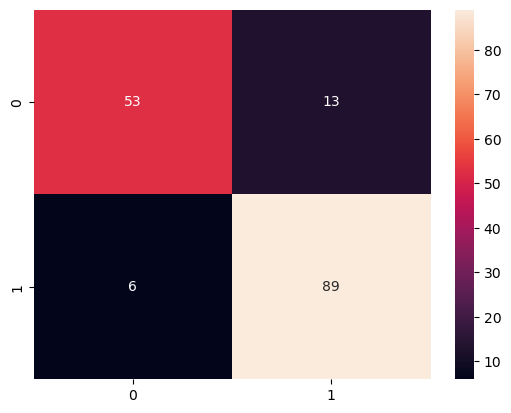

In [28]:
import seaborn as sns

sns.heatmap(cm, annot=True)